In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/gauravpks/ml-repo/master/HRDS/unit1.csv")

In [ ]:
data.head()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),Rating,Education\n(Highest\nDegree)
0,A0001,31-12-2016,Active,1,12-09-2016,Yes,NaN,No,NaN,12-09-2016,NaN,21-09-1992,NaN,NaN,NaN,At Target,BA/BS
1,A0002,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,16-11-1993,NaN,NaN,NaN,At Target,BA/BS
2,A0003,31-12-2016,Active,1,14-03-2016,Yes,NaN,No,NaN,14-03-2016,NaN,26-11-1993,NaN,NaN,NaN,At Target,MA/MS
3,A0004,31-12-2016,Active,1,12-09-2016,Yes,NaN,No,NaN,12-09-2016,NaN,28-03-1993,NaN,NaN,NaN,At Target,BA/BS
4,A0005,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,01-09-1992,NaN,NaN,NaN,At Target,BA/BS


In [ ]:
data.describe


<bound method NDFrame.describe of      Employee ID  ... Education\n(Highest\nDegree)
0          A0001  ...                        BA/BS
1          A0002  ...                        BA/BS
2          A0003  ...                        MA/MS
3          A0004  ...                        BA/BS
4          A0005  ...                        BA/BS
...          ...  ...                          ...
6323       A6324  ...                           JD
6324       A6325  ...                        BA/BS
6325       A6326  ...                        MA/MS
6326       A6327  ...                          MBA
6327       A6328  ...                        BA/BS

[6328 rows x 17 columns]>

In [ ]:
data.isnull().sum()

Employee ID                                             0
Data Effective Date                                     0
Employee\nStatus\n                                      0
Career Level \n(1=lowest, 6=highest)\n                  0
Hired Date                                              0
Hired in FY\n(Yes/No)                                   0
Termination Date                                     5920
Terminated\nin FY\n(Yes/No)                             0
Termination Type\n(Voluntary or Involuntary Exit)    5920
Job Start Date                                          0
Promoted\nin FY\n(Yes/No)                            1035
Birth Date                                              0
Age\n(Years)                                         6328
Tenure\n(Years)                                      6328
Time in\nJob (Years)                                 6328
Rating                                                  0
Education\n(Highest\nDegree)                            0
dtype: int64

In [ ]:
data.columns

Index(['Employee ID', 'Data Effective Date', 'Employee\nStatus\n',
       'Career Level \n(1=lowest, 6=highest)\n', 'Hired Date',
       'Hired in FY\n(Yes/No)', 'Termination Date',
       'Terminated\nin FY\n(Yes/No)',
       'Termination Type\n(Voluntary or Involuntary Exit)', 'Job Start Date',
       'Promoted\nin FY\n(Yes/No)', 'Birth Date', 'Age\n(Years)',
       'Tenure\n(Years)', 'Time in\nJob (Years)', 'Rating',
       'Education\n(Highest\nDegree)'],
      dtype='object')

In [ ]:
data.columns=['Employee_ID', 'DataEDate', 'Employee_Status','Career_Level', 'Hired_Date','HiredIn_FY', 'Termination_Date','TerminatedIn_FY','Termination_Type', 'Job_StartDate',
       'PromotedIn_FY', 'Birth_Date', 'Age','Tenure', 'TimeIn_Job', 'Rating','Education']

In [ ]:
data['NewTerminationDate']= data['Termination_Date'].fillna(data["DataEDate"])


In [ ]:
data['Birth_Date'] = pd.to_datetime(data['Birth_Date'])
data['DataEDate'] = pd.to_datetime(data['DataEDate'])
data['Job_StartDate'] = pd.to_datetime(data['Job_StartDate'])
data['Hired_Date'] = pd.to_datetime(data['Hired_Date'])
data['Termination_Date'] = pd.to_datetime(data['Termination_Date'])

In [ ]:
data['Age'] = (data['DataEDate'] - data['Birth_Date'])
data['Age'] = round((data['Age'].astype('timedelta64[D]'))/365,1)


In [ ]:
# def date_to_year(row):
#   return int(row["DataEDate"].split("-")[2])-int(row["Birth_Date"].split("-")[2])
# data["Age"]=data.apply(date_to_year, axis=1)  

# def tenure(row):
#   return int(row["NewTerminationDate"].split("-")[2])-int(row["Job_StartDate"].split("-")[2])
# data["Tenure"]=data.apply(tenure, axis=1)  

# def timeinjob(row):
#   return int(row["NewTerminationDate"].split("-")[2])- int(row["Hired_Date"].split("-")[2])
# data["TimeIn_Job"] = data.apply(timeinjob, axis=1) 

data['NewTerminationDate'] = data['Termination_Date'].fillna(data['DataEDate'])
data['NewTerminationDate'] = pd.to_datetime(data['NewTerminationDate'])

data['Tenure'] = (data['NewTerminationDate'] - data['Hired_Date'])
data['Tenure'] = round((data['Tenure'].astype('timedelta64[D]'))/365,1)

data['TimeIn_Job'] = (data['NewTerminationDate'] - data['Job_StartDate'])
data['TimeIn_Job'] = round((data['TimeIn_Job'].astype('timedelta64[D]'))/365,1)

data.drop('NewTerminationDate', axis='columns', inplace=True)

In [ ]:
data.isnull().sum()

Employee_ID            0
DataEDate              0
Employee_Status        0
Career_Level           0
Hired_Date             0
HiredIn_FY             0
Termination_Date    5920
TerminatedIn_FY        0
Termination_Type    5920
Job_StartDate          0
PromotedIn_FY       1035
Birth_Date             0
Age                    0
Tenure                 0
TimeIn_Job             0
Rating                 0
Education              0
dtype: int64

### **Visualization**

Employee Distribution- Carrer Level Wise (Active Employees)

In [ ]:
data_active = data[data.Termination_Date.isnull()]   
per_careerlevel= np.round((data_active["Career_Level"].value_counts(normalize=True)*100))
per_careerlevel

3    20.0
4    19.0
2    19.0
5    15.0
1    15.0
6    13.0
Name: Career_Level, dtype: float64

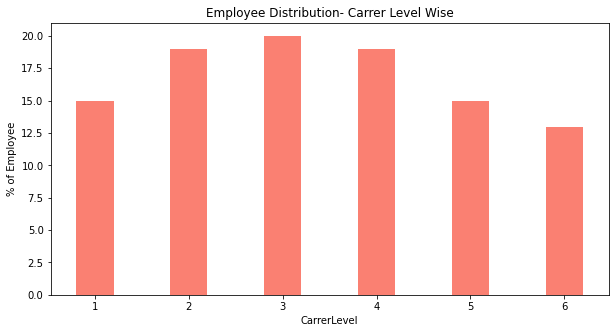

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(per_careerlevel.keys().values, per_careerlevel.to_numpy(), color ='salmon', width = 0.4) 
plt.xlabel("CarrerLevel") 
plt.ylabel("% of Employee") 
plt.title("Employee Distribution- Carrer Level Wise") 
plt.show()

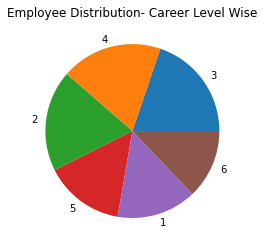

In [ ]:
plt.pie(per_careerlevel.to_numpy(), labels = per_careerlevel.keys().values) 
plt.title("Employee Distribution- Career Level Wise")  
plt.show()

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_sector = data_active.groupby(['Career_Level', 'Rating'])['Career_Level'].count().unstack().apply(f, axis=1)
con_sector

Rating,Above Target,At Target,Below Target,Significantly Above Target,Significantly Below Target
Career_Level,,,,,
1,20.0,61.0,16.0,3.0,1.0
2,32.0,47.0,11.0,10.0,NaN
3,41.0,41.0,6.0,12.0,NaN
4,56.0,43.0,NaN,1.0,NaN
5,67.0,31.0,NaN,2.0,NaN
6,79.0,20.0,NaN,1.0,NaN


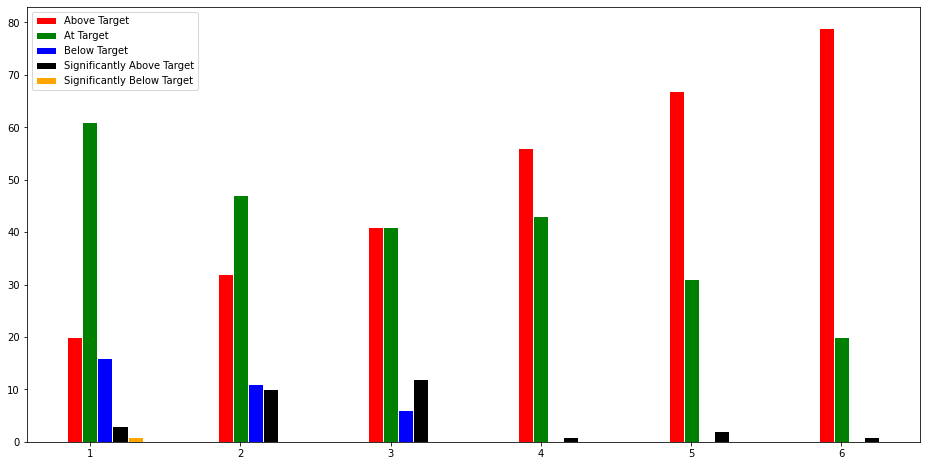

In [ ]:
fig = plt.figure(figsize = (16, 8))
# set width of bar
barWidth = 0.1
# set height of bar
bars1 = con_sector.to_numpy()[:,0]
bars2 = con_sector.to_numpy()[:,1]
bars3 = con_sector.to_numpy()[:,2]
bars4 = con_sector.to_numpy()[:,3]
bars5 = con_sector.to_numpy()[:,4]



# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]



# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label=con_sector.columns.values[0])
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label=con_sector.columns.values[1])
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label=con_sector.columns.values[2])
plt.bar(r4, bars4, color='black', width=barWidth, edgecolor='white', label=con_sector.columns.values[3])
plt.bar(r5, bars5, color='orange', width=barWidth, edgecolor='white', label=con_sector.columns.values[4])


 
# Add xticks on the middle of the group bars
#plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ('1','2','3','4','5',6))
 
# Create legend & Show graphic
plt.legend()
plt.show()


Employee Termination- Carrer Level Wise (Terminated Employees)

In [ ]:
data_inactive = pd.notnull(data["Termination_Date"])
data_inactive = data[data_inactive]
TerminationLevel_cnt =np.round((data_inactive['Career_Level'].value_counts(normalize=True)* 100 ))
TerminationLevel_cnt

1    33.0
2    27.0
3    23.0
4    11.0
5     4.0
6     2.0
Name: Career_Level, dtype: float64

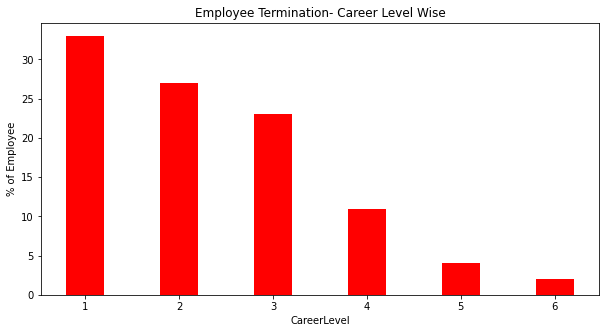

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(TerminationLevel_cnt.keys().values, TerminationLevel_cnt.to_numpy(), color ='red',  
        width = 0.4) 
plt.xlabel("CareerLevel") 
plt.ylabel("% of Employee") 
plt.title("Employee Termination- Career Level Wise") 
plt.show()

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_sector = data_inactive.groupby(['Career_Level', 'Rating'])['Career_Level'].count().unstack().apply(f, axis=1)
con_sector

Rating,Above Target,At Target,Below Target,Significantly Above Target,Significantly Below Target
Career_Level,,,,,
1,29.0,44.0,19.0,4.0,4.0
2,39.0,36.0,10.0,13.0,2.0
3,41.0,35.0,4.0,19.0,NaN
4,86.0,NaN,NaN,14.0,NaN
5,78.0,NaN,NaN,22.0,NaN
6,62.0,NaN,NaN,38.0,NaN


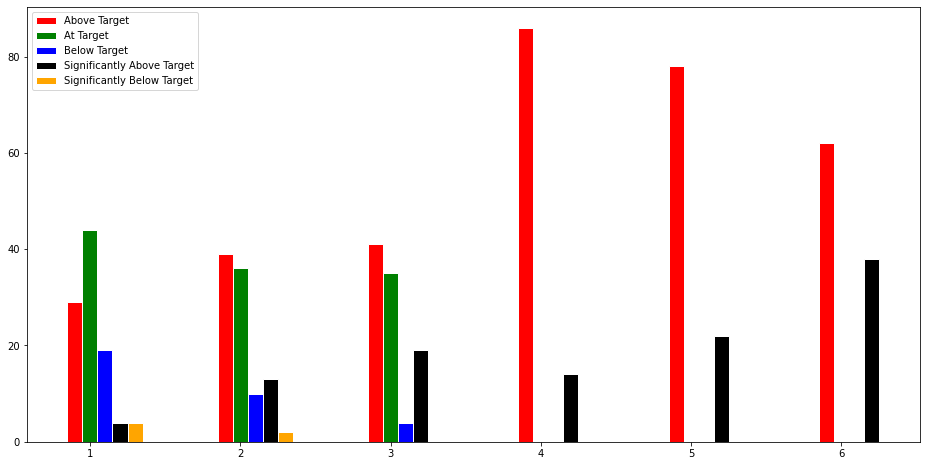

In [ ]:
fig = plt.figure(figsize = (16, 8))
# set width of bar
barWidth = 0.1
# set height of bar
bars1 = con_sector.to_numpy()[:,0]
bars2 = con_sector.to_numpy()[:,1]
bars3 = con_sector.to_numpy()[:,2]
bars4 = con_sector.to_numpy()[:,3]
bars5 = con_sector.to_numpy()[:,4]



# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]



# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label=con_sector.columns.values[0])
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label=con_sector.columns.values[1])
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label=con_sector.columns.values[2])
plt.bar(r4, bars4, color='black', width=barWidth, edgecolor='white', label=con_sector.columns.values[3])
plt.bar(r5, bars5, color='orange', width=barWidth, edgecolor='white', label=con_sector.columns.values[4])


 
# Add xticks on the middle of the group bars
#plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ('1','2','3','4','5',6))
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
TerminationType_cnt =np.round((data_inactive['Termination_Type'].value_counts(normalize=True)* 100 ))
TerminationType_cnt

Voluntary Exit      79.0
Involuntary Exit    21.0
Name: Termination_Type, dtype: float64

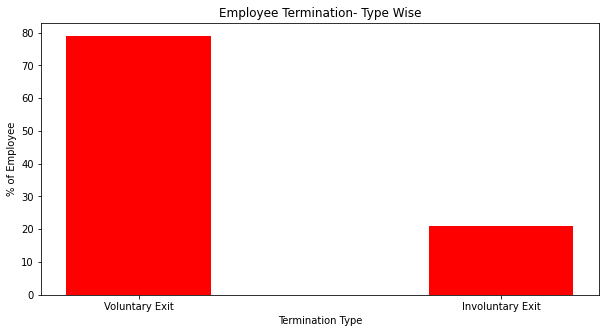

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(TerminationType_cnt.keys().values, TerminationType_cnt.to_numpy(), color ='red',  
        width = 0.4) 
plt.xlabel("Termination Type") 
plt.ylabel("% of Employee") 
plt.title("Employee Termination- Type Wise") 
plt.show()

In [ ]:
TerminationInFY_cnt =np.round((data['TerminatedIn_FY'].value_counts(normalize=True)* 100 ))
TerminationInFY_cnt

No     94.0
Yes     6.0
Name: TerminatedIn_FY, dtype: float64

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_term = data.groupby(['Career_Level', 'TerminatedIn_FY'])['TerminatedIn_FY'].count().unstack().apply(f, axis=1)
con_term

TerminatedIn_FY,No,Yes
Career_Level,,
1,87.0,13.0
2,91.0,9.0
3,93.0,7.0
4,96.0,4.0
5,98.0,2.0
6,99.0,1.0


In [ ]:
PromotedInFY_cnt =np.round((data['PromotedIn_FY'].value_counts(normalize=True)* 100 ))
PromotedInFY_cnt


No     82.0
Yes    18.0
Name: PromotedIn_FY, dtype: float64

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_prom = data.groupby(['Career_Level', 'PromotedIn_FY'])['PromotedIn_FY'].count().unstack().apply(f, axis=1)
con_prom

PromotedIn_FY,No,Yes
Career_Level,,
2,70.0,30.0
3,78.0,22.0
4,85.0,15.0
5,88.0,12.0
6,94.0,6.0


In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['PromotedIn_FY', 'TerminatedIn_FY'])['TerminatedIn_FY'].count().unstack().apply(f, axis=1)
con_p_term

TerminatedIn_FY,No,Yes
PromotedIn_FY,,
No,94.0,6.0
Yes,100.0,NaN


In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['PromotedIn_FY', 'Rating'])['PromotedIn_FY'].count().unstack().apply(f, axis=1)
con_p_term

Rating,Above Target,At Target,Below Target,Significantly Above Target,Significantly Below Target
PromotedIn_FY,,,,,
No,51.0,41.0,5.0,4.0,0.0
Yes,61.0,22.0,1.0,16.0,NaN


In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['TerminatedIn_FY', 'Rating'])['TerminatedIn_FY'].count().unstack().apply(f, axis=1)
con_p_term

Rating,Above Target,At Target,Below Target,Significantly Above Target,Significantly Below Target
TerminatedIn_FY,,,,,
No,48.0,41.0,6.0,5.0,0.0
Yes,43.0,32.0,10.0,12.0,2.0


In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['TerminatedIn_FY', 'Rating',"Termination_Type"])['Rating'].count().unstack().apply(f, axis=1)
con_p_term

Termination_Type                            Involuntary Exit  Voluntary Exit
TerminatedIn_FY Rating                                                      
Yes             Above Target                             8.0            92.0
                At Target                               23.0            77.0
                Below Target                            78.0            22.0
                Significantly Above Target               NaN           100.0
                Significantly Below Target             100.0             NaN

In [ ]:
per_Emp_status= np.round((data["Employee_Status"].value_counts(normalize=True)*100))
per_Emp_status

Active        94.0
Terminated     6.0
Name: Employee_Status, dtype: float64

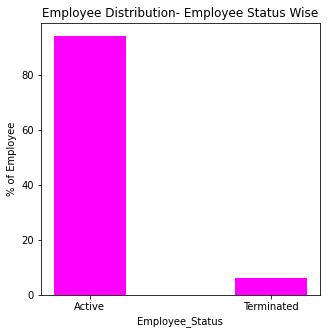

In [ ]:
fig = plt.figure(figsize = (5, 5)) 
plt.bar(per_Emp_status.keys().values, per_Emp_status.to_numpy(), color ='fuchsia', width = 0.4) 
plt.xlabel("Employee_Status") 
plt.ylabel("% of Employee") 
plt.title("Employee Distribution- Employee Status Wise") 
plt.show()

In [ ]:
per_rating= np.round((data["Rating"].value_counts(normalize=True)*100))
per_rating

Above Target                  47.0
At Target                     41.0
Below Target                   6.0
Significantly Above Target     6.0
Significantly Below Target     0.0
Name: Rating, dtype: float64

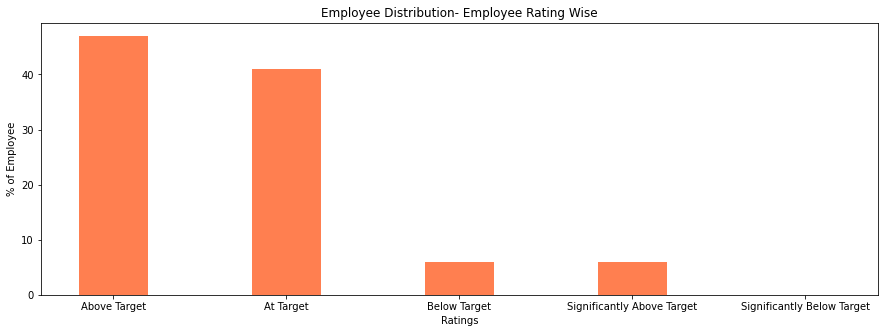

In [ ]:
fig = plt.figure(figsize = (15, 5)) 
plt.bar(per_rating.keys().values, per_rating.to_numpy(), color ='coral', width = 0.4) 
plt.xlabel("Ratings") 
plt.ylabel("% of Employee") 
plt.title("Employee Distribution- Employee Rating Wise") 
plt.show()

In [ ]:
per_edu= np.round((data["Education"].value_counts(normalize=True)*100))
per_edu

BA/BS    58.0
MA/MS    20.0
MBA      19.0
PhD       1.0
JD        1.0
Name: Education, dtype: float64

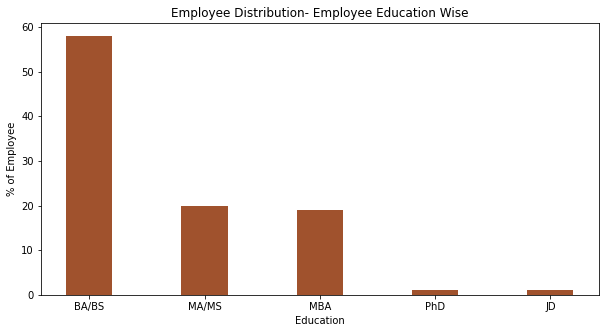

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(per_edu.keys().values, per_edu.to_numpy(), color ='sienna', width = 0.4) 
plt.xlabel("Education") 
plt.ylabel("% of Employee") 
plt.title("Employee Distribution- Employee Education Wise") 
plt.show()

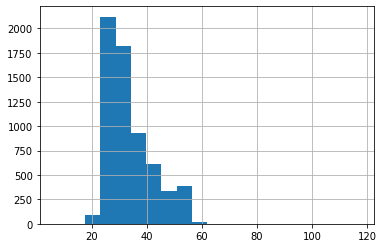

In [ ]:
data['Age'].hist(bins =20);

In [ ]:
data[data["Age"]>100 ]

,Employee_ID,DataEDate,Employee_Status,Career_Level,Hired_Date,HiredIn_FY,Termination_Date,TerminatedIn_FY,Termination_Type,Job_StartDate,PromotedIn_FY,Birth_Date,Age,Tenure,TimeIn_Job,Rating,Education
4322,A4323,2016-12-31,Active,5,1996-05-26,No,NaT,No,NaN,2009-07-08,No,1900-01-09,117.1,20.6,7.5,Above Target,MA/MS


In [ ]:
data[data["Age"]<15]

,Employee_ID,DataEDate,Employee_Status,Career_Level,Hired_Date,HiredIn_FY,Termination_Date,TerminatedIn_FY,Termination_Type,Job_StartDate,PromotedIn_FY,Birth_Date,Age,Tenure,TimeIn_Job,Rating,Education
702,A0703,2016-12-31,Active,1,2014-09-13,No,NaT,No,NaN,2014-09-13,NaN,2010-07-05,6.5,2.3,2.3,At Target,BA/BS


In [ ]:
data['AgeGroups']=pd.cut(data.Age,np.arange(20, 70, 5))

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['AgeGroups', 'Rating'])['Rating'].count().unstack().apply(f, axis=1)
con_p_term

Rating,Above Target,At Target,Below Target,Significantly Above Target,Significantly Below Target
AgeGroups,,,,,
"(20, 25]",20.0,61.0,16.0,3.0,1.0
"(25, 30]",35.0,45.0,10.0,10.0,0.0
"(30, 35]",50.0,41.0,3.0,7.0,0.0
"(35, 40]",63.0,35.0,0.0,2.0,0.0
"(40, 45]",67.0,31.0,0.0,2.0,0.0
"(45, 50]",80.0,19.0,0.0,1.0,0.0
"(50, 55]",79.0,19.0,0.0,1.0,0.0
"(55, 60]",79.0,19.0,0.0,1.0,0.0
"(60, 65]",50.0,0.0,0.0,50.0,0.0


In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['AgeGroups',  'Termination_Type'])['TerminatedIn_FY'].count().unstack().apply(f, axis=1)
con_p_term

Termination_Type,Involuntary Exit,Voluntary Exit
AgeGroups,,
"(20, 25]",41.0,59.0
"(25, 30]",20.0,80.0
"(30, 35]",8.0,92.0
"(35, 40]",0.0,100.0
"(40, 45]",0.0,100.0
"(45, 50]",0.0,100.0
"(50, 55]",0.0,100.0
"(55, 60]",0.0,100.0
"(60, 65]",0.0,100.0


In [ ]:
data['TenureGroups']=pd.cut(data.Tenure,np.arange(0, 35, 5))

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['TenureGroups',  'Termination_Type'])['TerminatedIn_FY'].count().unstack().apply(f, axis=1)
con_p_term

Termination_Type,Involuntary Exit,Voluntary Exit
TenureGroups,,
"(0, 5]",33.0,67.0
"(5, 10]",14.0,86.0
"(10, 15]",0.0,100.0
"(15, 20]",0.0,100.0
"(20, 25]",0.0,100.0
"(25, 30]",0.0,100.0
